{% include toc title = "In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Explain how text data can be analyzed to identify sentiments (i.e. attitudes) toward a particular subject.
* Analyze sentiments in tweets. 

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson.

</div>

## Sentiment Analysis

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity. 

In this lesson, you will apply sentiment analysis to Twitter data using the `Python` package `textblob`. You will calculate a polarity value for each tweet on a given subject and then plot these values in a histogram to identify the overall sentiment toward the subject of interest. 

### Get and Clean Tweets Related to Climate

Begin by reviewing how to search for and clean tweets that you will use to analyze sentiments in Twitter data.

_test - force trigger rebuild_

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Remember to define your keys: 

```python 
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'
```

In [ ]:
consumer_key = os.environ['tw_consumer_key']
consumer_secret = os.environ['tw_consumer_secret']
access_token = os.environ['tw_access_token']
access_token_secret = os.environ['tw_access_secret']

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Using what you have learned in the previous lessons, grab and clean up 1000 recent tweets. For this analysis, you only need to remove URLs from the tweets. 

In [4]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [5]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

## Analyze Sentiments in Tweets

You can use the `Python` package `textblob` to calculate the polarity values of individual tweets on climate change. 

Begin by creating `textblob` objects, which assigns polarity values to the tweets. You can identify the polarity value using the attribute `.polarity` of `texblob` object.

In [6]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity"))

You can apply list comprehension to create a list of the polarity values and text for each tweet, and then create a `Pandas Dataframe` from the list. 

In [7]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

In [8]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.00,trees and Nativeforests are immensely valuable...
1,0.20,At the end of the day if what you care about i...
2,0.00,World Bank to raise 200 billion to fight clima...
3,0.25,TheWorld Bankis to make about 200bn 157bn avai...
4,0.00,Can thank Harper conservatives and now the Tru...


These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject. 

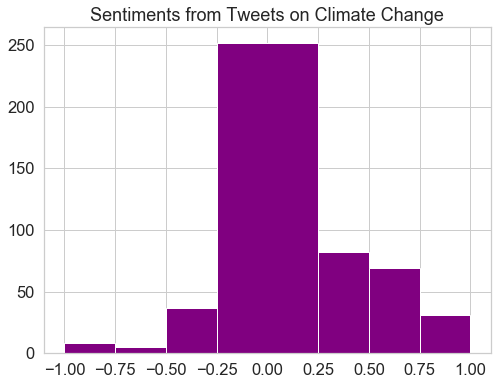

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

To get a better visual of the polarit values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.

In [10]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

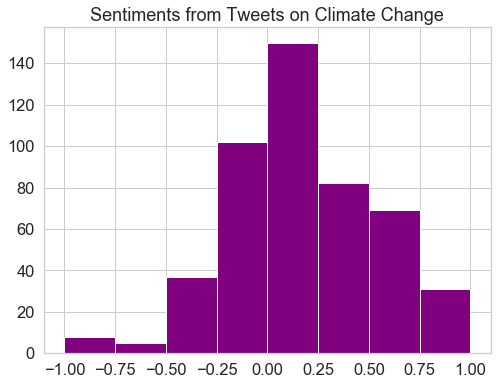

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

What does the histogram of the polarity values tell you about sentiments in the tweets gathered from the search "#climate+change -filter:retweets"? Are they more positive or negative?

### Get and Analyze Tweets Related to the Camp Fire

Next, explore a new topic, the 2018 Camp Fire in California. 

Begin by searching for the tweets and combining the cleaning of the data (i.e. removing URLs) with the creation of the `textblob` objects. 

In [12]:
search_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Paradises evacuation notifications and protocols MTI research associate and deputy director of the National Tran"),
 TextBlob("Missing tally in Californias CampFire down to 25hbbp ParadiseCA the whole town that burned down had 26000 ppl"),
 TextBlob("Collecting 70000 images over 17000 acres resulting in 14 trillion pixels of data Thats what a squadron of"),
 TextBlob("Tuxita Chiquita Lolita is a little under the weather so we did our best to cheer her up CampFire moggyblog"),
 TextBlob("An entire homeowners insurance company is going under because of the CampFire home claims I doubt this will be th")]

Then, you can create the `Pandas Dataframe` of the polarity values and plot the histogram for the Camp Fire tweets, just like you did for the climate change data. 

In [15]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
1,-0.077778,Missing tally in Californias CampFire down to ...
3,0.406250,Tuxita Chiquita Lolita is a little under the w...
5,-0.092857,The communities may have very limited services...
6,0.136364,Opal at the vet hospital playroom while we kee...
7,-0.125000,California regulator takes over small failing ...


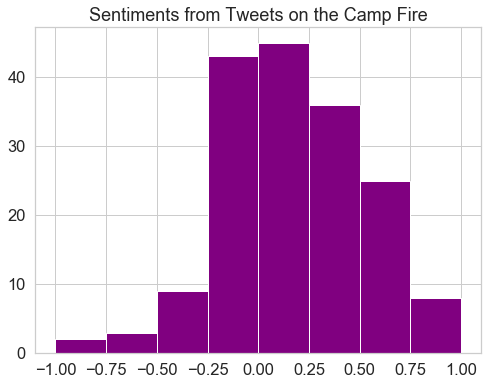

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()

Based on this histogram, would you say that the sentiments from the Camp Fire tweets are more positive or negative?